# YAJAT DUREJA 2210990970
# VIPASH ARORA 2210990964
# YAJUR 2210990971

## 1 Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


##  2 Loading the dataset

In [2]:
data = pd.read_csv("wine_csv.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# Names of all the columns in features
print(data.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [4]:
# Checking if there are any non-null values in dataset
# and also confirming that columns have right datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Conclusions ->

| **Sr. no.** | **Name** | **Description** |
| :---: | ---- | ---- |
| 1 | **fixed acidity** | Primary fixed acids found in wine are tartaric, succinic, citric, and malic |
| 2 | **volatile acidity** | Volatile acidity is the gaseous acids present in wine. |
| 3 | **citric acid** | It is weak organic acid, found in citrus fruits naturally. |
| 4 | **residual sugar** | Amount of sugar left after fermentation. |
| 5 | **chlorides** | Amount of salt present in wine.|
| 6 | **free sulphur dioxide** | So2 used for prevention of wine by oxidation and microbial spoilage. |
| 7 | **total sulphur dioxides** | Sum of free and combined SO2 |
| 8 | **density** | thickness of wine | 
| 9 | **pH** |  pH is used for checking acidity |
| 10 | **sulphates** | Added sulfites preserve freshness and protect wine from oxidation, and bacteria. |
| 11 | **alcohol** | Percent of alcohol present in wine. |
| 12 | **quality** | Target label with 6 classes in range 3-8 |

- This is a multiclass classification problem, as labels are discrete.
- There are 11 features (attributes).
- There are no null values, so we don't need to do Data manipulation
- 

## 3 Exploratory data analysis

Exploratory data analysis (EDA) is an approach to analyze data sets to summarize their main characteristics, often with visual methods.

- It helps us to uncover the underlying structure of data and its dynamics through which we can maximize the insights. 
- EDA is also critical to extract important variables and detect outliers and anomalies. 
- EDA is considered one of the most critical parts to understand the data.

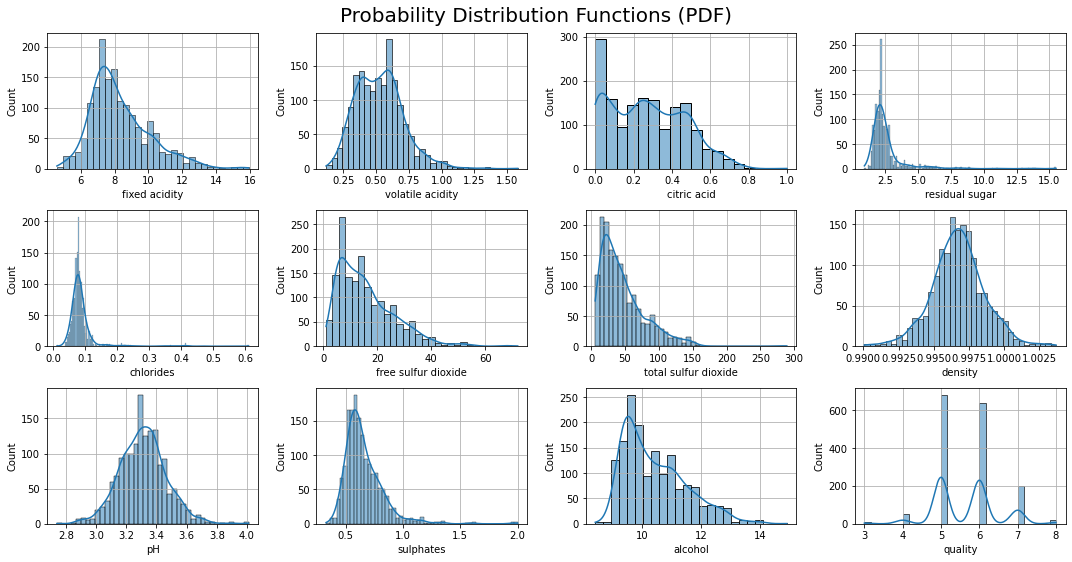

In [5]:
# features.hist(figsize=(15,10), bins=20);

# Plotting the histplot + kde of all the featues to check for outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.columns.values):
    plt.subplot(4, 4, i+1)
    sns.histplot(data[col], kde=True)
    plt.grid(); plt.tight_layout()
    plt.suptitle("Probability Distribution Functions (PDF)", size=20)

> We can conclude from above KDE plots that **pH** and **density** attributes have near normal disribuiton.

> All other attributes are positively skewed

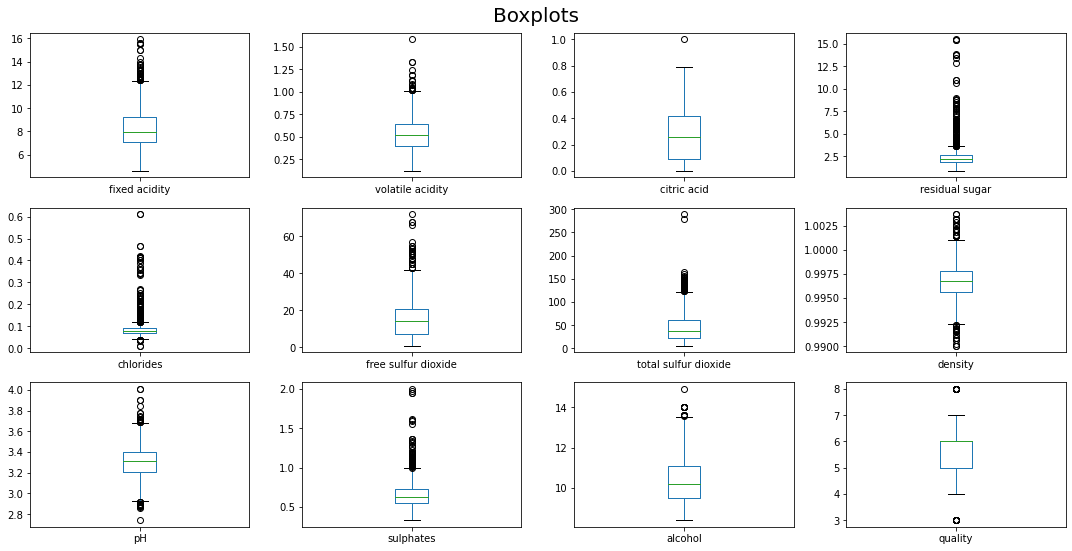

In [6]:
# Plotting the boxplot of all the featues to check for outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.columns.values):
    plt.subplot(4, 4, i+1)
    data.boxplot(col)
    plt.grid(); plt.tight_layout()
    plt.suptitle("Boxplots", size=20)

> We can conclude form the above boxplots that all columns have outliers

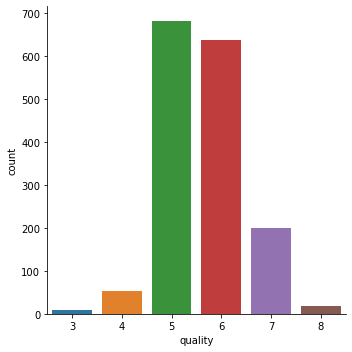

In [7]:
# Visualizing the count of all 6 classes of target label
sns.catplot(x='quality', data = data, kind = 'count')

> “quality” has a high number of values in categories 5 and 6.

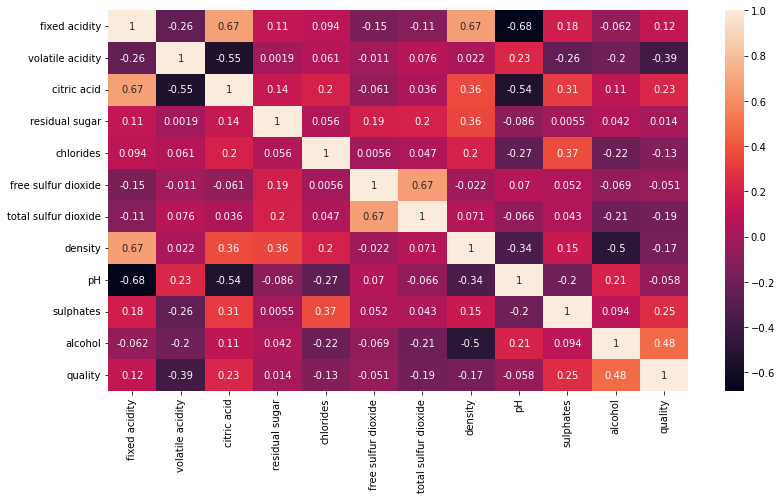

In [8]:
# Checking the correlation between features
plt.figure(figsize=(13, 7))
sns.heatmap(data.corr(), annot=True, color='k');

## 4 Data Preprocessing

### Dividing the data into test and training sets

In [9]:
# separate the feature and Label
X = data.drop('quality',axis=1)
y = data['quality'].copy()


In [10]:
# from sklearn.preprocessing import LabelBinarizer
# y = LabelBinarizer().fit_transform(y)
y = data['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
# y

In [11]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

## Building various models

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
final_scores = {}

### 1 Decision tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

pipe1 = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=42))
pipe1.fit(X_train, y_train)
y_pred1 = pipe1.predict(X_test)
print(classification_report(y_test, y_pred1))
final_scores['DecisionTree']  = pipe1.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       273
           1       0.57      0.51      0.54        47

    accuracy                           0.87       320
   macro avg       0.74      0.72      0.73       320
weighted avg       0.87      0.87      0.87       320



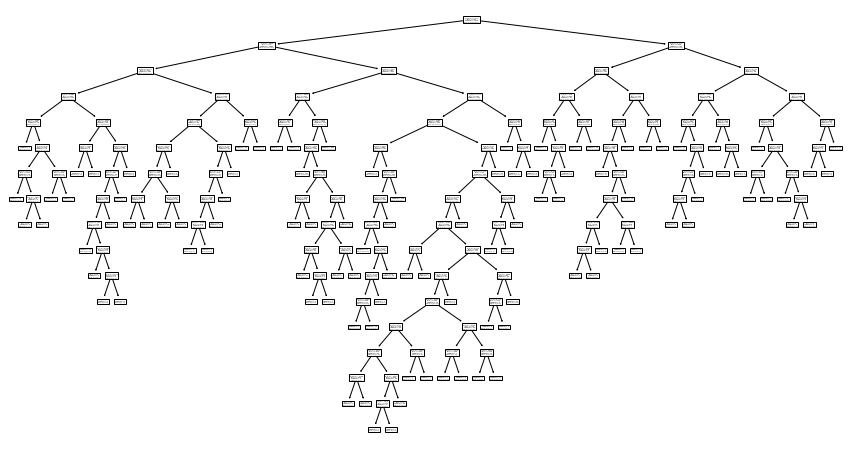

In [14]:
# Visualizing the decision tree
from sklearn import tree
fig = plt.figure(figsize=(15,8))
tree.plot_tree(pipe1['decisiontreeclassifier']);
# fig.savefig('dtree.png')

### 2 Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

pipe2 = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))
pipe2.fit(X_train, y_train)
y_pred2 = pipe2.predict(X_test)
print(classification_report(y_test, y_pred2))
final_scores['RandomForest'] = pipe2.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       273
           1       0.79      0.55      0.65        47

    accuracy                           0.91       320
   macro avg       0.86      0.76      0.80       320
weighted avg       0.91      0.91      0.91       320



### 3 AdaBoost

In [16]:
from sklearn.ensemble import AdaBoostClassifier

pipe3 = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))
pipe3.fit(X_train, y_train)
y_pred3 = pipe3.predict(X_test)
print(classification_report(y_test, y_pred3))
final_scores['AdaBoost'] = pipe3.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       273
           1       0.45      0.32      0.38        47

    accuracy                           0.84       320
   macro avg       0.67      0.63      0.64       320
weighted avg       0.82      0.84      0.83       320



### 4 Gradient Boost

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

pipe4 = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))
pipe4.fit(X_train, y_train)
y_pred4 = pipe4.predict(X_test)
print(classification_report(y_test, y_pred4))
final_scores['GradBoost'] =  pipe4.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.90      0.95      0.93       273
           1       0.59      0.40      0.48        47

    accuracy                           0.87       320
   macro avg       0.75      0.68      0.70       320
weighted avg       0.86      0.87      0.86       320



### 5 Naive Bayes classifier

In [18]:
from sklearn.naive_bayes import GaussianNB

pipe5 = make_pipeline(StandardScaler(), GaussianNB())
pipe5.fit(X_train, y_train)
y_pred5 = pipe5.predict(X_test)
print(classification_report(y_test, y_pred5))
final_scores['NaiveBayes'] =  pipe5.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       273
           1       0.49      0.79      0.60        47

    accuracy                           0.85       320
   macro avg       0.72      0.82      0.75       320
weighted avg       0.89      0.85      0.86       320



### 6 Support Vector Classifier

In [19]:
from sklearn.svm import SVC

pipe6 = make_pipeline(StandardScaler(), SVC())
pipe6.fit(X_train, y_train)
y_pred6 = pipe6.predict(X_test)
print(classification_report(y_test, y_pred6))
final_scores['SupportVector'] = pipe6.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



### 7 Logistic regression

In [20]:
from sklearn.linear_model import LogisticRegressionCV

pipe7 = make_pipeline(StandardScaler(), LogisticRegressionCV(random_state=1))
pipe7.fit(X_train, y_train)
y_pred7 = pipe7.predict(X_test)
print(classification_report(y_test, y_pred7))
final_scores['LogisticRegression'] = pipe7.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.89      0.97      0.92       273
           1       0.59      0.28      0.38        47

    accuracy                           0.87       320
   macro avg       0.74      0.62      0.65       320
weighted avg       0.84      0.87      0.84       320



In [21]:
# Comparing 7 of above models - 
final_scores = dict(sorted(final_scores.items(), key=lambda item: item[1], reverse=True))
final_scores

{'RandomForest': 0.9125,
 'SupportVector': 0.875,
 'DecisionTree': 0.871875,
 'GradBoost': 0.871875,
 'LogisticRegression': 0.865625,
 'NaiveBayes': 0.846875,
 'AdaBoost': 0.84375}

## Selecting best features

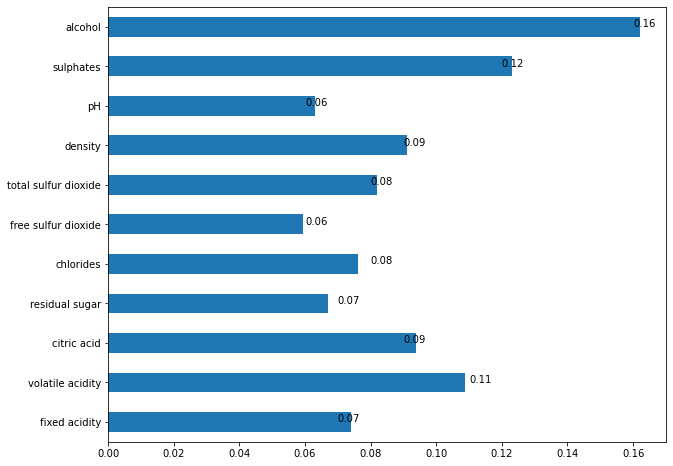

In [22]:
feat_importances = pd.Series(pipe2['randomforestclassifier'].feature_importances_, 
                             index= X_train.columns)
feat_importances.plot(kind='barh',figsize=(10,8))

for i, v in enumerate(round(feat_importances, 2)):
    plt.text(v, i, str(v))

### CONCLUSION - 
So, alcohol content is the most important feature in predicting the quality of wine 

# YAJAT DUREJA 2210990970
# VIPASH ARORA 2210990964
# YAJUR 2210990971